In [27]:
import numpy as np, pandas as pd

from matplotlib import pyplot as plt

%matplotlib inline

In [28]:
file2_path = '../../PHENOTYPE/XL280x431/XL280x431_cross_amoeba_full_01_2021.csv'

In [29]:
#len(New_segs[(New_segs.Day == 1)]), len(New_segs[(New_segs.Day == 12)])

In [30]:
New_segs = pd.read_csv(file2_path)

New_segs.columns = [c.capitalize() for c in New_segs.columns]

New_segs.drop("Replicate",axis = 1, inplace = True)

New_segs.loc[(New_segs.Strain == "KN99"), "Strain"] = "Kn99"

New_segs["Replicate"] = New_segs.groupby(['Strain', 'Day']).cumcount()+1

New_segs.head()

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Issues,Replicate
0,B960,1,1,p2_1,10,0.268,20737.321,18336.0,23488.0,NaN,1
1,B377,1,1,p2_1,10,0.352,20349.177,17239.0,25692.0,NaN,1
2,C031,1,1,p2_1,10,0.030,19746.096,18081.0,24509.0,NaN,1
3,B560,1,1,p2_1,10,0.786,20653.039,16551.0,27029.0,NaN,1
4,B313,1,1,p2_1,10,0.598,20776.284,17215.0,25699.0,NaN,1


In [31]:
bad_bois = []

for i,j in enumerate(New_segs.Strain.unique()):
    temp = New_segs[(New_segs.Strain == j)]
    d1 = temp[(temp.Day == 1)].count()["Strain"].sum()
    d12 = temp[(temp.Day == 12)].count()["Strain"].sum()
#    d = temp.groupby(["Replicate", "Day"]).count()["Strain"].sum()
    if d1 != d12:
        bad_bois.append(j)
        
bad_bois

[]

In [32]:
New_segs[(New_segs.Strain == 'Kn99')]

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Issues,Replicate
60,Kn99,1,6,p2_1,10,0.588,21534.508,18716.0,28734.0,NaN,1
72,Kn99,1,1,p1_1,11,0.465,21026.450,18516.0,27351.0,NaN,2
184,Kn99,12,6,p2_1,10,7.238,20269.962,14059.0,38749.0,NaN,1
196,Kn99,12,1,p1_1,11,7.384,19807.162,9265.0,35346.0,NaN,2
308,Kn99,1,6,2_2-1_2_firsthalf,4,0.364,40164.999,33661.0,47589.0,NaN,3
369,Kn99,12,6,2_2-1_2_firsthalf,4,NaN,NaN,NaN,NaN,detached,3
422,Kn99,1,5,2_2-1_2_secondhalf,5,0.981,38086.942,31705.0,47796.0,NaN,4
484,Kn99,12,5,2_2-1_2_secondhalf,5,5.990,35882.479,29060.0,65534.0,NaN,4
543,Kn99,1,5,2_3-1_3_secondhalf,9,0.162,38189.746,33734.0,45291.0,NaN,5
599,Kn99,12,5,2_3-1_3_secondhalf,9,1.626,35895.521,30890.0,47514.0,NaN,5


In [33]:
#where issues aren't missing

issues_ix = New_segs["Issues"].dropna().index.values

New_segs.drop(issues_ix, axis = 0, inplace = True)

New_segs.dropna(axis = 1, inplace =True, how = "all") #filtered out all issues verified by removal of the column based on it being entirely NA

New_segs.head()

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate
0,B960,1,1,p2_1,10,0.268,20737.321,18336.0,23488.0,1
1,B377,1,1,p2_1,10,0.352,20349.177,17239.0,25692.0,1
2,C031,1,1,p2_1,10,0.030,19746.096,18081.0,24509.0,1
3,B560,1,1,p2_1,10,0.786,20653.039,16551.0,27029.0,1
4,B313,1,1,p2_1,10,0.598,20776.284,17215.0,25699.0,1


In [34]:
bad_bois = []

for i,j in enumerate(New_segs.Strain.unique()):
    temp = New_segs[(New_segs.Strain == j)]
    d = temp.groupby(["Replicate", "Day"]).count()["Strain"].sum()
    if d>6:
        bad_bois.append(j)
    

In [35]:
bad_bois

['B575', '431alpha', 'B886', 'XL280a', 'B373', 'Kn99', 'B872_cor']

In [36]:
check_segs = []

for i,j in enumerate(New_segs.Strain.unique()):
    temp = New_segs[(New_segs.Strain == j)]
    d1 = temp[(temp.Day == 1)]
    d12 = temp[(temp.Day == 12)]
    r1 = d1.Replicate.unique()
    r12 = d12[(d12.Replicate.isin(r1))].Replicate.unique()
    if len(r1) != len(r12):
        check_segs.append(j)

In [37]:
check_segs

['C242',
 'B908',
 'B886_cor',
 'C029_cor',
 'B886',
 'XL280alpha',
 'B872',
 'B382',
 'XL280a',
 'B896',
 'B373',
 'B961',
 'Kn99',
 'B905',
 'B580',
 'B586',
 'B611',
 'B606',
 'B869_cor',
 'B378',
 'B927',
 'B563',
 'C026_cor',
 'B906_cor',
 'B584',
 'B873_cor']

In [38]:
New_segs[(New_segs.Strain.isin(check_segs))].sort_values(by = ["Strain", "Day", "Replicate"])

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate
48,B373,1,5,p2_1,10,0.364,21313.122,18563.0,32544.0,1
80,B373,1,2,p1_1,11,0.338,21252.887,10138.0,26532.0,2
268,B373,1,2,2_2-1_2_firsthalf,4,0.713,40971.329,35669.0,65534.0,3
642,B373,1,4,2_3-1_3_firsthalf,7,0.389,36985.929,31222.0,45994.0,4
172,B373,12,5,p2_1,10,1.452,20408.597,18031.0,29864.0,1
...,...,...,...,...,...,...,...,...,...,...
24,XL280alpha,1,3,p2_1,10,0.346,21357.707,18613.0,25252.0,1
410,XL280alpha,1,4,2_2-1_2_secondhalf,5,0.150,39559.034,33758.0,48058.0,2
533,XL280alpha,1,4,2_3-1_3_secondhalf,9,0.085,38053.007,34606.0,42374.0,3
148,XL280alpha,12,3,p2_1,10,3.685,20467.839,17400.0,30885.0,1


In [39]:
len(check_segs)

26

In [40]:
## Load genotype data
genotype_path = 'C:\\Users\\Thomas\\Documents\\GitHub\\Bt22xFtc555-1\\GENOTYPE\\CDx-ill-SNP-INDEL-df-104-blocked.csv.gz'
gv = pd.read_csv(genotype_path)
gv.head()

,Chrom,Pos,Qual,Callrate,Ref,Alt,Altlen,Dp,Type,Vcfix,...,SS-B598,SS-B565,SS-B600,SS-B574,SS-B872_cor,SS-B873_cor,SS-B360,SS-B397,SS-B564,SS-B382
0,Chr01,5016,104492.0,1.0,C,A,1,6510,snp,289,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Chr01,5299,112647.0,1.0,T,C,1,9711,snp,293,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,Chr01,5464,112658.0,1.0,T,C,1,9375,snp,294,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,Chr01,6120,109003.0,1.0,T,C,1,9311,snp,311,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Chr01,6166,114638.0,1.0,G,A,1,9269,snp,312,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [41]:
four31_ix = New_segs[(New_segs.Strain == "431alpha")].index.values

In [42]:
Strain_names = []
Dont_rep = []
for i,j in New_segs.iterrows():
    
    s = j.Strain
    
    if s in gv.columns:
        Strain_names.append(s)
    
    elif 'SS-'+s in gv.columns:
        Strain_names.append('SS-'+s)
            
    elif s == '431alpha':
        Strain_names.append('SS-A837')
    elif s == 'KN99':
        Strain_names.append('KN99')
    else:
        Dont_rep.append('SS-'+s)
        Strain_names.append(s)

print(len(Strain_names))
print(Strain_names[:10])

680
['B960', 'B377', 'C031', 'SS-B560', 'SS-B313', 'SS-B887_cor', 'SS-C272', 'SS-C242', 'SS-C031_cor', 'SS-B316']


In [43]:
New_segs["Sample"] = Strain_names

In [44]:
New_segs_fil = New_segs[(New_segs.Sample.isin(gv.columns))]

New_segs_fil.reset_index(drop = True)

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample
0,B560,1,1,p2_1,10,0.786,20653.039,16551.0,27029.0,1,SS-B560
1,B313,1,1,p2_1,10,0.598,20776.284,17215.0,25699.0,1,SS-B313
2,B887_cor,1,1,p2_1,10,0.097,20857.606,18288.0,28200.0,1,SS-B887_cor
3,C272,1,1,p2_1,10,0.949,20819.746,16169.0,29019.0,1,SS-C272
4,C242,1,1,p2_1,10,0.532,21357.110,18833.0,28168.0,1,SS-C242
...,...,...,...,...,...,...,...,...,...,...,...
576,B887,12,5,2_3-1_3_firsthalf,7,3.042,36058.384,31116.0,52350.0,3,SS-B887
577,B354,12,5,2_3-1_3_firsthalf,7,8.461,35935.746,23258.0,65521.0,3,SS-B354
578,B621,12,5,2_3-1_3_firsthalf,7,1.926,35795.020,31573.0,46680.0,3,SS-B621
579,B563,12,5,2_3-1_3_firsthalf,7,1.415,37754.443,33354.0,47264.0,3,SS-B563


In [45]:
miss_segs = [s for s in New_segs_fil.Sample.unique() if s not in gv.columns]

len(miss_segs), miss_segs[:3]

(0, [])

In [46]:
also_miss = [s for s in gv.columns if s not in New_segs_fil.Sample.unique()]

len(also_miss), also_miss[0:21]

(21,
 ['Chrom',
  'Pos',
  'Qual',
  'Callrate',
  'Ref',
  'Alt',
  'Altlen',
  'Dp',
  'Type',
  'Vcfix',
  'Cum_pos',
  'Posk',
  'Logdp',
  'Lognq',
  'AF',
  'Dps',
  'is_ref',
  'Start',
  'End',
  'Co',
  'Block'])

In [47]:
PMY_segs = New_segs_fil[~(New_segs_fil.Strain.isin(bad_bois))] #tilde is opposite day

PMY_segs[(PMY_segs.Strain == "431alpha")]

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample


In [48]:
ring = []

for i,j in PMY_segs.groupby(["Sample", "Replicate"]):
    #test = j
    a12 = j[(j.Day == 12)].Area.mean()
    a1 = j[(j.Day == 1)].Area.mean()
    adiff = a12 - a1
    ring.append((i[0],i[1],adiff))
    
ringdf = pd.DataFrame(ring, columns = ["Sample", "Replicate", "Halo"])

In [50]:
ringdf.to_csv("C:\\Users\\Thomas\\Documents\\GitHub\\Bt22xFtc555-1\\PHENOTYPE\\XL280x431\\XL280x431_halo.csv", index = False)

In [51]:
ringdf.dropna().shape

(254, 3)

In [52]:
ringdf.shape

(276, 3)

In [53]:
ringdf_NA_ix = [i for i in ringdf.index if i not in ringdf.dropna().index]

In [54]:
ringdf.loc[ringdf_NA_ix, :]

,Sample,Replicate,Halo
59,SS-B378,3,NaN
65,SS-B382,3,NaN
88,SS-B563,2,NaN
108,SS-B580,1,NaN
112,SS-B584,2,NaN
117,SS-B586,1,NaN
142,SS-B606,3,NaN
144,SS-B611,2,NaN
150,SS-B869_cor,3,NaN
152,SS-B872,2,NaN


In [55]:
upmy,rep_count = np.unique(ringdf.Sample.values, return_counts = True)

upmy[(rep_count == 2)].min()

'SS-B350'

In [56]:
upmy[(rep_count == 2)]

array(['SS-B350', 'SS-B364', 'SS-B366', 'SS-B396', 'SS-B397', 'SS-B553',
       'SS-B587', 'SS-B589', 'SS-B591', 'SS-B598', 'SS-B621',
       'SS-B874_cor', 'SS-B880', 'SS-B892_cor', 'SS-B898_cor', 'SS-B930',
       'SS-B952', 'SS-C039'], dtype=object)

In [57]:
New_segs_fil[(New_segs_fil.Strain == "431alpha")]

,Strain,Day,Stack,Plate,Passage,Area,Mean,Min,Max,Replicate,Sample
18,431alpha,1,2,p2_1,10,0.228,19479.516,16552.0,29639.0,1,SS-A837
71,431alpha,1,1,p1_1,11,0.246,20911.930,18376.0,28900.0,2,SS-A837
142,431alpha,12,2,p2_1,10,2.035,20195.453,17035.0,34628.0,1,SS-A837
195,431alpha,12,1,p1_1,11,2.996,20181.444,9555.0,29881.0,2,SS-A837
261,431alpha,1,2,2_2-1_2_firsthalf,4,0.224,38786.133,35137.0,45463.0,3,SS-A837
322,431alpha,12,2,2_2-1_2_firsthalf,4,2.901,36457.140,32243.0,50130.0,3,SS-A837
421,431alpha,1,5,2_2-1_2_secondhalf,5,0.243,37749.529,33466.0,46282.0,4,SS-A837
483,431alpha,12,5,2_2-1_2_secondhalf,5,3.684,37402.958,23020.0,50206.0,4,SS-A837
496,431alpha,1,1,2_3-1_3_secondhalf,9,0.375,38958.850,34557.0,48139.0,5,SS-A837
552,431alpha,12,1,2_3-1_3_secondhalf,9,2.033,37162.173,30953.0,50288.0,5,SS-A837


In [58]:
PMY_rents = New_segs_fil[(New_segs_fil.Strain.isin(["XL280a", "XL280alpha", "431alpha"]))]

PMY_rents_grouped = [p[1] for p in PMY_rents.groupby(["Strain", "Plate"])] #p[1] a list showing the strain group and run with the dataframe to follow

In [69]:
PMY_rents.to_csv("C:\\Users\\Thomas\\Documents\\GitHub\\Bt22xFtc555-1\\PHENOTYPE\\XL280x431\\parents_XL280x431_halo.csv", index = False)

In [60]:
ring_rents = []

for z,df in enumerate(PMY_rents_grouped):

    for i,j in df.groupby(["Sample", "Replicate"]):
        #test = j
        a12 = j[(j.Day == 12)].Area.mean()
        a1 = j[(j.Day == 1)].Area.mean()
        adiff = a12 - a1
        ring_rents.append((i[0],i[1],adiff,z))
    
ring_rents_df = pd.DataFrame(ring_rents, columns = ["Sample", "Replicate", "Halo", "Z"])

In [61]:
ring_rents_df

,Sample,Replicate,Halo,Z
0,SS-A837,3,2.677,0
1,SS-A837,4,3.441,1
2,SS-A837,6,2.183,2
3,SS-A837,5,1.658,3
4,SS-A837,2,2.750,4
5,SS-A837,1,1.807,5
6,XL280a,3,0.527,6
7,XL280a,5,NaN,7
8,XL280a,4,-0.028,8
9,XL280a,2,4.662,9


In [63]:
ring_rents_df.to_csv("C:\\Users\\Thomas\\Documents\\GitHub\\Bt22xFtc555-1\\PHENOTYPE\XL280x431\\XL280x431_halo_parents.csv", index = False)

C:\Users\Thomas\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Thomas\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


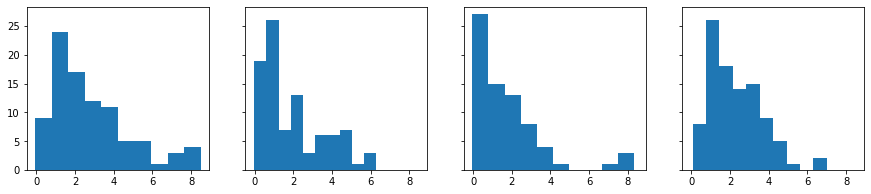

In [64]:
fig,ax = plt.subplots(1,4, figsize = (15, 3), sharex= True, sharey= True)
for i,r in enumerate(ringdf.Replicate.unique()):
    plt.sca(ax[i])
    h = ringdf[(ringdf.Replicate == r)].Halo.values
    plt.hist(h)

plt.sca(ax[-1])

m = ringdf.groupby("Sample").agg(np.mean).Halo.values

plt.hist(m);

In [ ]:
ringdf.groupby("Sample").agg(np.mean).Halo.hist()

In [ ]:
#ringdf.to_csv("C:\\Users\\Thomas\\Documents\\bt22xftc555_data_curation\\bt22xftc555_halo_new.csv", index = False)

In [ ]:
plt.plot(ringdf[(ringdf.Replicate == 3)].Halo.values, ringdf[(ringdf.Replicate == 2)].Halo.values, '.');

In [ ]:
plt.hist(PMY_segs[(PMY_segs.Day == 12)].Area.values);